In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline
import datetime as dt
from scipy import stats


## Data Analysis

In [2]:
county = pd.read_csv('Data/county_cleaned.csv', parse_dates = ['date','stsipstart', 'stsipend', 'localsipstart', 'localsipend','stbusclose', 
                'localbusclose', 'stbusopen','localbusopen','stresclose','stresopen',
                'localresclose','localresopen'])
state = pd.read_csv('Data/state_cleaned.csv')
policy = pd.read_csv('Data/policy_cleaned.csv')

/Users/amc/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (23,30,32,34,36,40,42,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
county.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,...,localresopennotes,dummyresclose,dummyresopen,link,countyfips_str,statefips_str,Geo_FIPS,SE_A00001_001,SE_A00002_002,SE_A00002_003
0,0,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-15,17.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757
1,1,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-16,8.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757
2,2,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-17,9.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757
3,3,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-18,7.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757
4,4,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-19,12.0,...,NaN,0,0,re-open plan https://baldwincountyal.gov/docs/...,3,1,1003,208107,130.9019,1589.793757


In [4]:
county.columns

Index(['Unnamed: 0', 'country_region_code', 'country_region', 'sub_region_1',
       'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code',
       'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'fips', 'stfips', 'stname',
       'countyfips', 'countyname', 'cityname', 'stsipstart', 'stsipend',
       'stsipnotes', 'localsipstart', 'localsipend', 'localsipnotes',
       'dummysipstart', 'dummysipend', 'stbusclose', 'stbusclosenotes',
       'localbusclose', 'localbusclosenotes', 'stbusopen', 'stbusopennotes',
       'localbusopen', 'localbusopennotes', 'dummybusclose', 'dummybusopen',
       'stresclose', 'stresclosenotes', 'stresopen', 'stresopennotes',
       'localresclose', 'localresclosenotes', '

In [5]:
county = county.drop(['dummyresclose', 'dummyresopen','dummysipstart', 
                 'dummysipend','dummybusclose', 'dummybusopen'], axis = 1)

In [6]:
county[['sub_region_1',
       'sub_region_2','date','transit_stations_percent_change_from_baseline',
       'stsipstart', 'stsipend','localsipstart', 'localsipend','stbusclose', 'stbusopen',
       'localbusclose','localbusopen','stresclose','stresopen','localresclose','localresopen']]

,sub_region_1,sub_region_2,date,transit_stations_percent_change_from_baseline,stsipstart,stsipend,localsipstart,localsipend,stbusclose,stbusopen,localbusclose,localbusopen,stresclose,stresopen,localresclose,localresopen
0,Alabama,Baldwin County,2020-02-15,8.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
1,Alabama,Baldwin County,2020-02-16,7.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
2,Alabama,Baldwin County,2020-02-17,7.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
3,Alabama,Baldwin County,2020-02-18,0.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
4,Alabama,Baldwin County,2020-02-19,8.0,2020-04-04,2020-04-30,NaT,NaT,2020-03-28,2020-04-30,NaT,NaT,2020-03-19,2020-05-11,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240875,Wyoming,Uinta County,2020-11-04,18.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-03-19,2020-05-15,NaT,2020-05-06
240876,Wyoming,Uinta County,2020-11-05,23.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-03-19,2020-05-15,NaT,2020-05-06
240877,Wyoming,Uinta County,2020-11-06,24.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-03-19,2020-05-15,NaT,2020-05-06
240878,Wyoming,Uinta County,2020-11-07,11.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2020-03-19,2020-05-15,NaT,2020-05-06


In [7]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~date-1', data = county).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.200
Model:                                                       OLS   Adj. R-squared:                  0.199
Method:                                            Least Squares   F-statistic:                     225.7
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                                                   10:33:32   Log-Likelihood:            -1.1010e+06
No. Observations:                                         240880   AIC:                         2.203e+06
Df Residuals:                                             240612   BIC:                         2.205e+06
Df Model:                                                    267                                         
Covariance Type:                              

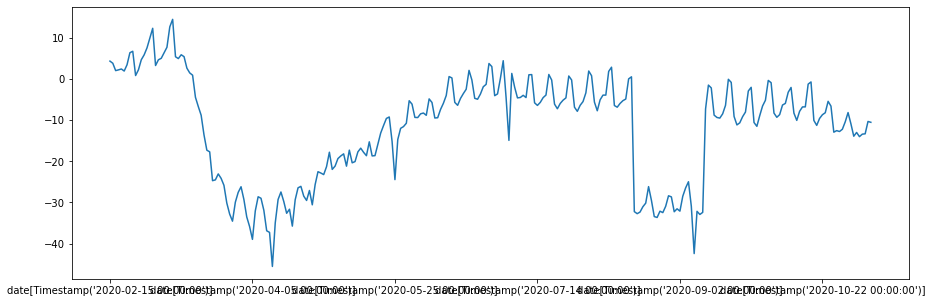

In [8]:
lm.params.plot(figsize = (15,5))

In [98]:
len(county[county['SE_A00001_001']>= 50000])/len(county)

0.6905591655974505

In [99]:
# Population filtering for "urban" areas
county = county[county['SE_A00001_001']>= 50000]

In [100]:
# creating our categorical date/lockdown variables
county['stsip_dummy'] = 'Never'
county.loc[(county['date'] < county['stsipstart']), 'stsip_dummy'] = 'Before'
county.loc[(county['date'] >= county['stsipstart']) & (county['date'] <= county['stsipend']), 'stsip_dummy'] = 'During'
county.loc[(county['date'] > county['stsipend']), 'stsip_dummy'] = 'After'

county['localsip_dummy'] = 'Never'
county.loc[(county['date'] < county['localsipstart']), 'localsip_dummy'] = 'Before'
county.loc[(county['date'] >= county['localsipstart']) & (county['date'] <= county['localsipend']), 'localsip_dummy'] = 'During'
county.loc[(county['date'] > county['localsipend']), 'localsip_dummy'] = 'After'

county['stbus_dummy'] = 'Never'
county.loc[(county['date'] < county['stbusclose']), 'stbus_dummy'] = 'Before'
county.loc[(county['date'] >= county['stbusclose']) & (county['date'] <= county['stbusopen']), 'stbus_dummy'] = 'During'
county.loc[(county['date'] > county['stbusopen']), 'stbus_dummy'] = 'After'

# county['localbus_dummy'] = 'Before'
# county.loc[(county['date'] >= county['localbusstart']) & (county['date'] <= county['localbusend']), 'localbus_dummy'] = 'During'
# county.loc[(county['date'] > county['localbusend']), 'localbus_dummy'] = 'After'

county['stres_dummy'] = 'Never'
county.loc[(county['date'] < county['stresclose']), 'stres_dummy'] = 'Before'
county.loc[(county['date'] >= county['stresclose']) & (county['date'] <= county['stresopen']), 'stres_dummy'] = 'During'
county.loc[(county['date'] > county['stresopen']), 'stres_dummy'] = 'After'

# county['localres_dummy'] = 'Before'
# county.loc[(county['date'] >= county['localresstart']) & (county['date'] <= county['localresend']), 'localres_dummy'] = 'During'
# county.loc[(county['date'] > county['localresend']), 'localres_dummy'] = 'After'



<ipython-input-100-54deafb20c62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['stsip_dummy'] = 'Never'
/Users/amc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-100-54deafb20c62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [101]:
county['stsip_dummy_before'] = 0
county.loc[county['stsip_dummy'] == 'During', 'stsip_dummy_before'] = 1
county.loc[(county['stsip_dummy'] == 'After') | (county['stsip_dummy'] == 'Never'), 'stsip_dummy_before'] = np.nan

county['stbus_dummy_before'] = 0
county.loc[county['stbus_dummy'] == 'During', 'stbus_dummy_before'] = 1
county.loc[(county['stbus_dummy'] == 'After') | (county['stbus_dummy'] == 'Never'), 'stbus_dummy_before'] = np.nan

county['stres_dummy_before'] = 0
county.loc[county['stres_dummy'] == 'During', 'stres_dummy_before'] = 1
county.loc[(county['stres_dummy'] == 'After') | (county['stres_dummy'] == 'Never'), 'stres_dummy_before'] = np.nan

<ipython-input-101-41db459bca1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['stsip_dummy_before'] = 0
<ipython-input-101-41db459bca1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['stbus_dummy_before'] = 0
<ipython-input-101-41db459bca1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [102]:
county['stres_dummy_before'].value_counts()

1.0    37971
0.0    22239
Name: stres_dummy_before, dtype: int64

In [107]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stsip_dummy_before+stbus_dummy_before+stres_dummy_before+SE_A00001_001-1', 
             data = county).fit()
print(lm.summary())

                                              OLS Regression Results                                              
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared (uncentered):                   0.658
Model:                                                       OLS   Adj. R-squared (uncentered):              0.658
Method:                                            Least Squares   F-statistic:                          2.191e+04
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                                                   11:33:25   Log-Likelihood:                     -1.9473e+05
No. Observations:                                          45470   AIC:                                  3.895e+05
Df Residuals:                                              45466   BIC:                                  3.895e+05
Df Model:                                                      4                

In [110]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stsip_dummy_before+stbus_dummy_before+stres_dummy_before-1', 
             data = county).fit()
print(lm.summary())

                                              OLS Regression Results                                              
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared (uncentered):                   0.647
Model:                                                       OLS   Adj. R-squared (uncentered):              0.647
Method:                                            Least Squares   F-statistic:                          2.774e+04
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                                                   11:35:25   Log-Likelihood:                     -1.9550e+05
No. Observations:                                          45470   AIC:                                  3.910e+05
Df Residuals:                                              45467   BIC:                                  3.910e+05
Df Model:                                                      3                

In [104]:
county['stsip_dummy_after'] = 0
county.loc[county['stsip_dummy'] == 'During', 'stsip_dummy_after'] = 1
county.loc[(county['stsip_dummy'] == 'Before') | (county['stsip_dummy'] == 'Never'), 'stsip_dummy_after'] = np.nan

county['stbus_dummy_after'] = 0
county.loc[county['stbus_dummy'] == 'During', 'stbus_dummy_after'] = 1
county.loc[(county['stbus_dummy'] == 'Before') | (county['stbus_dummy'] == 'Never'), 'stbus_dummy_after'] = np.nan

county['stres_dummy_after'] = 0
county.loc[county['stres_dummy'] == 'During', 'stres_dummy_after'] = 1
county.loc[(county['stres_dummy'] == 'Before') | (county['stres_dummy'] == 'Never'), 'stres_dummy_after'] = np.nan

<ipython-input-104-f7454d207c1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['stsip_dummy_after'] = 0
<ipython-input-104-f7454d207c1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county['stbus_dummy_after'] = 0
<ipython-input-104-f7454d207c1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [108]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stsip_dummy_after+stbus_dummy_after+stres_dummy_after+SE_A00001_001-1', 
             data = county).fit()
print(lm.summary())

                                              OLS Regression Results                                              
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared (uncentered):                   0.630
Model:                                                       OLS   Adj. R-squared (uncentered):              0.630
Method:                                            Least Squares   F-statistic:                          1.668e+04
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                                                   11:34:19   Log-Likelihood:                     -1.7522e+05
No. Observations:                                          39197   AIC:                                  3.504e+05
Df Residuals:                                              39193   BIC:                                  3.505e+05
Df Model:                                                      4                

In [109]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stsip_dummy_after+stbus_dummy_after+stres_dummy_after-1', 
             data = county).fit()
print(lm.summary())

                                              OLS Regression Results                                              
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared (uncentered):                   0.548
Model:                                                       OLS   Adj. R-squared (uncentered):              0.548
Method:                                            Least Squares   F-statistic:                          1.584e+04
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                                                   11:34:49   Log-Likelihood:                     -1.7914e+05
No. Observations:                                          39197   AIC:                                  3.583e+05
Df Residuals:                                              39194   BIC:                                  3.583e+05
Df Model:                                                      3                

In [111]:
before = county[county['stsip_dummy_before'] == 0][['transit_stations_percent_change_from_baseline']]
after = county[county['stsip_dummy_before'] == 1][['transit_stations_percent_change_from_baseline']]

In [112]:
beforebus = county[county['stbus_dummy_before'] == 0][['transit_stations_percent_change_from_baseline']]
afterbus = county[county['stbus_dummy_before'] == 1][['transit_stations_percent_change_from_baseline']]

In [113]:
beforeres = county[county['stres_dummy_before'] == 0][['transit_stations_percent_change_from_baseline']]
afterres = county[county['stres_dummy_before'] == 1][['transit_stations_percent_change_from_baseline']]

In [82]:
before.values

array([[  8.],
       [  7.],
       [  7.],
       ...,
       [-18.],
       [-28.],
       [-38.]])

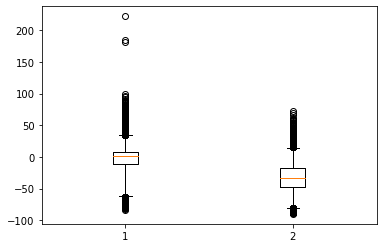

In [114]:
ax = plt.subplot(1, 1, 1)
ax.boxplot([before.values, after.values], whis=[1, 99])
plt.show()

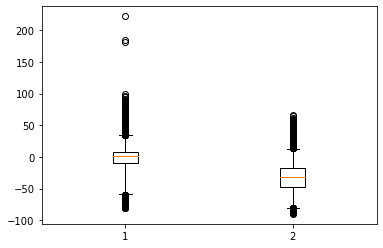

In [115]:
ax = plt.subplot(1, 1, 1)
ax.boxplot([beforebus.values, afterbus.values], whis=[1, 99])
plt.show()

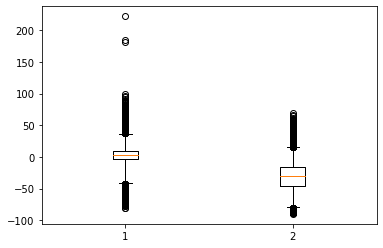

In [116]:
ax = plt.subplot(1, 1, 1)
ax.boxplot([beforeres.values, afterres.values], whis=[1, 99])
plt.show()

In [10]:
county = county[county['date'] <= dt.datetime(2020,6,15)]

In [11]:
county['stsip_dummy'].value_counts()

During    38750
Before    37027
After     25728
Never     19300
Name: stsip_dummy, dtype: int64

In [12]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stsip_dummy-1', data = county).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.217
Model:                                                       OLS   Adj. R-squared:                  0.217
Method:                                            Least Squares   F-statistic:                 1.115e+04
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                                                   10:33:33   Log-Likelihood:            -5.4376e+05
No. Observations:                                         120805   AIC:                         1.088e+06
Df Residuals:                                             120801   BIC:                         1.088e+06
Df Model:                                                      3                                         
Covariance Type:                              

In [13]:
county['stsip_dummy_prediction'] = lm.predict()

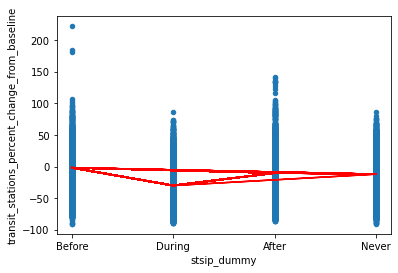

In [14]:
fig, ax = plt.subplots() #get axis to plot on
county.plot(ax=ax,kind='scatter',x='stsip_dummy', y='transit_stations_percent_change_from_baseline') #show the data
ax.plot(county['stsip_dummy'],county['stsip_dummy_prediction'],'r-'); #show the regression line

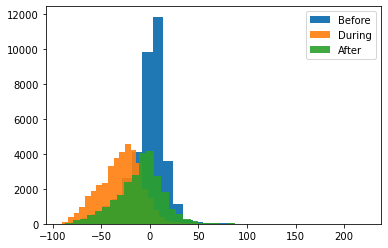

In [15]:
#histograms of daily counts in 2019 and 2018 - distributions look different
plt.hist(county.loc[county['stsip_dummy']=='Before']['transit_stations_percent_change_from_baseline'].values,bins=30,label='Before')
plt.hist(county.loc[county['stsip_dummy']=='During']['transit_stations_percent_change_from_baseline'].values,bins=30,alpha=0.9,label='During')
plt.hist(county.loc[county['stsip_dummy']=='After']['transit_stations_percent_change_from_baseline'].values,bins=30,alpha=0.9,label='After')
#plt.hist(dfTaxiDaily.loc[dfTaxiDaily['Year']==2020]['trip_count'].values,bins=30,alpha=0.5,label='2020')
plt.legend()

In [16]:
stats.ttest_ind(county.loc[county['stsip_dummy']=='Before']['transit_stations_percent_change_from_baseline'],
                county.loc[county['stsip_dummy']=='During']['transit_stations_percent_change_from_baseline'])


Ttest_indResult(statistic=191.9060351081645, pvalue=0.0)

In [17]:
stats.ttest_ind(county.loc[county['stsip_dummy']=='During']['transit_stations_percent_change_from_baseline'],
                county.loc[county['stsip_dummy']=='After']['transit_stations_percent_change_from_baseline'])

Ttest_indResult(statistic=-110.34914572631634, pvalue=0.0)

In [18]:
stats.ttest_ind(county.loc[county['stsip_dummy']=='Before']['transit_stations_percent_change_from_baseline'],
                county.loc[county['stsip_dummy']=='After']['transit_stations_percent_change_from_baseline'])

Ttest_indResult(statistic=48.33697790986899, pvalue=0.0)

In [19]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stsip_dummy+stbus_dummy-1', data = county).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.242
Model:                                                       OLS   Adj. R-squared:                  0.241
Method:                                            Least Squares   F-statistic:                     6411.
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                                                   10:33:35   Log-Likelihood:            -5.4182e+05
No. Observations:                                         120805   AIC:                         1.084e+06
Df Residuals:                                             120798   BIC:                         1.084e+06
Df Model:                                                      6                                         
Covariance Type:                              

In [20]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stbus_dummy-1', data = county).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.210
Model:                                                       OLS   Adj. R-squared:                  0.210
Method:                                            Least Squares   F-statistic:                 1.069e+04
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                                                   10:33:35   Log-Likelihood:            -5.4430e+05
No. Observations:                                         120805   AIC:                         1.089e+06
Df Residuals:                                             120801   BIC:                         1.089e+06
Df Model:                                                      3                                         
Covariance Type:                              

In [21]:
county.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,...,statefips_str,Geo_FIPS,SE_A00001_001,SE_A00002_002,SE_A00002_003,stsip_dummy,localsip_dummy,stbus_dummy,stres_dummy,stsip_dummy_prediction
0,0,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-15,17.0,...,1,1003,208107,130.9019,1589.793757,Before,Never,Before,Before,-1.882626
1,1,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-16,8.0,...,1,1003,208107,130.9019,1589.793757,Before,Never,Before,Before,-1.882626
2,2,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-17,9.0,...,1,1003,208107,130.9019,1589.793757,Before,Never,Before,Before,-1.882626
3,3,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-18,7.0,...,1,1003,208107,130.9019,1589.793757,Before,Never,Before,Before,-1.882626
4,4,US,United States,Alabama,Baldwin County,NaN,NaN,1003.0,2020-02-19,12.0,...,1,1003,208107,130.9019,1589.793757,Before,Never,Before,Before,-1.882626


In [22]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stsip_dummy+SE_A00001_001-1', data = county).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.284
Model:                                                       OLS   Adj. R-squared:                  0.284
Method:                                            Least Squares   F-statistic:                 1.198e+04
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                                                   10:33:36   Log-Likelihood:            -5.3834e+05
No. Observations:                                         120805   AIC:                         1.077e+06
Df Residuals:                                             120800   BIC:                         1.077e+06
Df Model:                                                      4                                         
Covariance Type:                              

In [23]:
county['stsip_dummy_prediction'] = lm.predict()

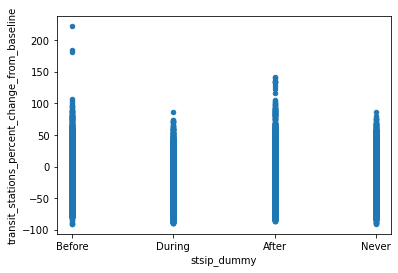

In [24]:
fig, ax = plt.subplots() #get axis to plot on
county.plot(ax=ax,kind='scatter',x='stsip_dummy', y='transit_stations_percent_change_from_baseline') #show the data
#ax.plot(county['stsip_dummy'],county['stsip_dummy_prediction'],'r-'); #show the regression line

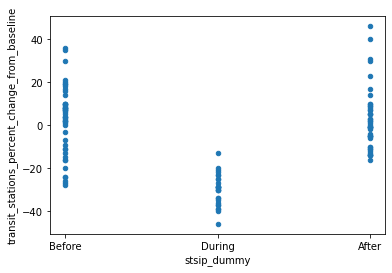

In [25]:
county.loc[county['census_fips_code'] == 1003].plot(kind='scatter',x='stsip_dummy', y='transit_stations_percent_change_from_baseline')

plt.show()

In [26]:
sip_agg = county.groupby(['sub_region_1', 'sub_region_2','census_fips_code', 
                'SE_A00001_001','stsip_dummy'])['transit_stations_percent_change_from_baseline'].mean().reset_index()

In [27]:
res_agg = county.groupby(['sub_region_1', 'sub_region_2','census_fips_code', 
                'SE_A00001_001','stres_dummy'])['transit_stations_percent_change_from_baseline'].mean().reset_index()

In [28]:
bus_agg = county.groupby(['sub_region_1', 'sub_region_2','census_fips_code', 
                'SE_A00001_001','stbus_dummy'])['transit_stations_percent_change_from_baseline'].mean().reset_index()

In [29]:
lm = smf.ols(formula='transit_stations_percent_change_from_baseline~stsip_dummy-1', data = sip_agg).fit()
print(lm.summary())

                                          OLS Regression Results                                         
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.270
Model:                                                       OLS   Adj. R-squared:                  0.270
Method:                                            Least Squares   F-statistic:                     371.3
Date:                                           Wed, 09 Dec 2020   Prob (F-statistic):          4.05e-205
Time:                                                   10:33:36   Log-Likelihood:                -12963.
No. Observations:                                           3010   AIC:                         2.593e+04
Df Residuals:                                               3006   BIC:                         2.596e+04
Df Model:                                                      3                                         
Covariance Type:                              

In [30]:
sip_agg['stsip_dummy_prediction'] = lm.predict()

In [31]:
sort_dict = {'Never':0,'Before':1, 'During':2, 'After':3}

In [32]:
sip_agg['order'] = sip_agg['stsip_dummy']

In [33]:
sip_agg['order'] = sip_agg['order'].map(sort_dict)

In [34]:
sip_agg.sort_values(['census_fips_code','order'], inplace = True)

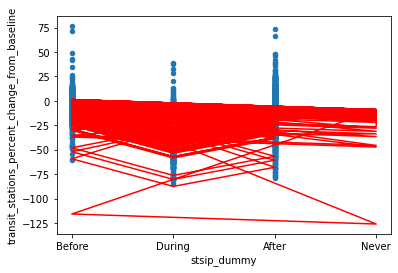

In [35]:
fig, ax = plt.subplots() #get axis to plot on
sip_agg[~(sip_agg['stsip_dummy']== 'Never')].plot(ax=ax,kind='scatter',x='stsip_dummy', y='transit_stations_percent_change_from_baseline') #show the data
ax.plot(county['stsip_dummy'],county['stsip_dummy_prediction'],'r-'); #show the regression line

In [36]:
county.loc[county['stbusclose'] == county['stbusopen']]

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,...,statefips_str,Geo_FIPS,SE_A00001_001,SE_A00002_002,SE_A00002_003,stsip_dummy,localsip_dummy,stbus_dummy,stres_dummy,stsip_dummy_prediction


In [37]:
stats.ttest_ind(county.loc[county['stsip_dummy']=='During']['transit_stations_percent_change_from_baseline'],
                county.loc[county['stbus_dummy']=='During']['transit_stations_percent_change_from_baseline'])


Ttest_indResult(statistic=-5.690333679003745, pvalue=1.2728445082957677e-08)

In [38]:
import researchpy as rp

In [39]:
stats.f_oneway(county['transit_stations_percent_change_from_baseline'][county['stsip_dummy'] == 'Before'],
               county['transit_stations_percent_change_from_baseline'][county['stsip_dummy'] == 'During'],
               county['transit_stations_percent_change_from_baseline'][county['stsip_dummy'] == 'After'])

F_onewayResult(statistic=17556.006819154856, pvalue=0.0)

In [40]:
rp.summary_cont(sip_agg['transit_stations_percent_change_from_baseline'].groupby(sip_agg['stsip_dummy']))

,N,Mean,SD,SE,95% Conf.,Interval
stsip_dummy,,,,,,
After,875,-10.7958,22.1719,0.7495,-12.2669,-9.3246
Before,983,-3.1480,11.8753,0.3788,-3.8913,-2.4047
During,937,-29.8481,18.1646,0.5934,-31.0126,-28.6835
Never,215,-15.2930,20.8812,1.4241,-18.1000,-12.4859


In [41]:
stats.f_oneway(sip_agg['transit_stations_percent_change_from_baseline'][sip_agg['stsip_dummy'] == 'Before'],
               sip_agg['transit_stations_percent_change_from_baseline'][sip_agg['stsip_dummy'] == 'During'],
               sip_agg['transit_stations_percent_change_from_baseline'][sip_agg['stsip_dummy'] == 'After'])

F_onewayResult(statistic=572.1141549309535, pvalue=5.832386131638522e-209)

TypeError: boxplot() got an unexpected keyword argument 'by'

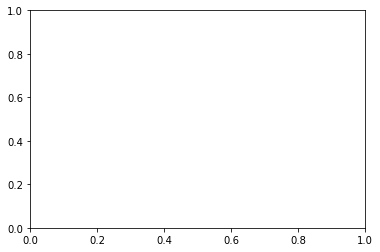

In [42]:
ax = plt.subplot(1, 1, 1)
ax.boxplot(sip_agg.transit_stations_percent_change_from_baseline, by = sip_agg['stsip_dummy'], whis=[1, 99])
#ax.set_yticklabels(10.0**np.arange(-1, 3, 1))
#ax.set_title('Taxi trip distance distribution, miles')
plt.show()

In [ ]:
bus_agg.boxplot('transit_stations_percent_change_from_baseline', by = 'stbus_dummy', whis = [1,99])

In [ ]:
# visualization ideas
# box plots for distribution
# distribution chart with semi-transparency
# maps